In [158]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split


In [159]:
train_df = pd.read_csv('/Users/ibm/Desktop/Python/Training/Kaggle/Kaggle Titanic/train.csv')
test_df = pd.read_csv('/Users/ibm/Desktop/Python/Training/Kaggle/Kaggle Titanic/test.csv')


In [160]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [161]:
train_df.drop('Cabin',axis=1,inplace=True)

In [162]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [163]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [164]:
train_df['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [165]:
train_df['Sex'] = train_df['Sex'].replace({'male':1,'female':0})
train_df['Sex']



0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [166]:
train_df['Sex'].head()


0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

In [167]:
print(train_df['Sex'].dtype)

int64


In [168]:
train_df.rename(columns={'Sex':'Male'},inplace=True)

In [169]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Male,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [170]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Male         891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [171]:
train_df_not = train_df[train_df['Age'].notnull()]
train_df_missing = train_df[train_df['Age'].isnull()]
train_df_not.head()


,PassengerId,Survived,Pclass,Name,Male,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Age', ylabel='Parch'>

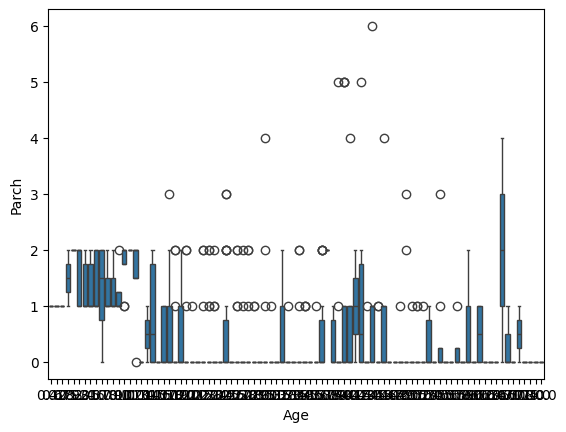

In [172]:
import seaborn as sns

sns.boxplot(x='Age',y='Parch',data=train_df)

In [173]:
x = train_df_not[['SibSp','Parch','Fare','Male']]
y = train_df_not[['Age']]

In [174]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [175]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [176]:
y


,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
885,39.0
886,27.0
887,19.0
889,26.0


In [177]:
y_pred = model.predict(x_train)
z_pred = model.predict(x_test)


In [181]:
from sklearn.metrics import mean_absolute_error 
 
mae = mean_absolute_error(y_train,y_pred)
print(mae)


10.958626312701554


In [ ]:
train_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [180]:
print("y_test shape:", y_test.shape)
print("z_pred shape:", z_pred.shape)

y_test shape: (143, 1)
z_pred shape: (143, 1)


In [ ]:
x_missing = x_train[missing_age]
x_missing = preprocess(x_missing)

In [186]:
missing_age = train_df['Age'].isnull()
x_missing = x_train[missing_age]
predicted_ages = model.predict(x_missing)

train_df.loc[missing_age,'Age'] = predicted_ages

print(train_df['Age']).isnull().sum()

/var/folders/jx/kpyxcvj127sck3_x3vwbtq600000gn/T/ipykernel_10614/3790937790.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x_missing = x_train[missing_age]


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by LinearRegression.